# Eksploracja danych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

# Wczytanie i przedstawienie zbioru

In [2]:
data = pd.read_excel("LingFeatured NLI_PL_20.03.2020.xlsx")

In [3]:
data.describe

<bound method NDFrame.describe of       id - pair                                              Deepl  \
0          1203  I said, "I have a test, I'm gonna fail biology...   
1          1671  Gliński did not have to turn his head to guess...   
2          2441                 Then he'll bring the Chinese back.   
3           945  He got weaker and weaker and felt that it was ...   
4           947  However, people who are very seriously ill, wh...   
...         ...                                                ...   
2591       1045  It was established that both girls could stay ...   
2592       2258  It was established that he had close social re...   
2593        863  Here you can see that the State of Israel has ...   
2594        443  Of course you can love if you see that this lo...   
2595        444  Of course you can love if you see that this lo...   

      czy była korekta translatora  \
0                                1   
1                                1   
2          

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id - pair                               2596 non-null   int64  
 1   Deepl                                   2596 non-null   object 
 2   czy była korekta translatora            2596 non-null   int64  
 3   T ENG                                   2596 non-null   object 
 4   T PL                                    2596 non-null   object 
 5   GOLD <T,H>                              2596 non-null   object 
 6   T - type of sentence                    2594 non-null   object 
 7   text - number                           2596 non-null   int64  
 8   verb - main semantic class              2596 non-null   object 
 9   verb - second semantic class            603 non-null    object 
 10  verb - third semantic class             107 non-null    obje

In [5]:
data.columns

Index(['id - pair', 'Deepl', 'czy była korekta translatora', 'T ENG', 'T PL',
       'GOLD <T,H>', 'T - type of sentence', 'text - number',
       'verb - main semantic class', 'verb - second semantic class',
       'verb - third semantic class', 'verb id', 'GOLD <T1,H>', 'WN', 'verb',
       'verb - veridical (positive enviroment)',
       'verb - veridical (negative enviroment)', 'T1', 'H', 'verb - tense',
       'realizacja predykatów', 'T - negation', 'complement - tense',
       'presupposition', 'ewaluacja wynikania ES', 'ewaluacja wynikania ŁW',
       'ES <T1, H>', 'ŁW <T1, H>', 'anotator_ES', 'annotator_ŁW',
       'annotator_JB', 'annotator_SF', 'Unnamed: 32'],
      dtype='object')

## Liczba braków

In [6]:
data.isnull().sum()

id - pair                                    0
Deepl                                        0
czy była korekta translatora                 0
T ENG                                        0
T PL                                         0
GOLD <T,H>                                   0
T - type of sentence                         2
text - number                                0
verb - main semantic class                   0
verb - second semantic class              1993
verb - third semantic class               2489
verb id                                      0
GOLD <T1,H>                                  0
WN                                           1
verb                                         0
verb - veridical (positive enviroment)       0
verb - veridical (negative enviroment)       0
T1                                        1602
H                                            1
verb - tense                                 0
realizacja predykatów                        0
T - negation 

## Średnia ze średniej liczby braków dla słów 

In [7]:
data.groupby(['verb']).apply(lambda df: df.isnull().mean()).mean()

id - pair                                 0.000000
Deepl                                     0.000000
czy była korekta translatora              0.000000
T ENG                                     0.000000
T PL                                      0.000000
GOLD <T,H>                                0.000000
T - type of sentence                      0.000419
text - number                             0.000000
verb - main semantic class                0.000000
verb - second semantic class              0.652597
verb - third semantic class               0.946412
verb id                                   0.000000
GOLD <T1,H>                               0.000000
WN                                        0.000195
verb                                      0.000000
verb - veridical (positive enviroment)    0.000000
verb - veridical (negative enviroment)    0.000000
T1                                        0.589793
H                                         0.000021
verb - tense                   

## Liczba unikalnych rekordów

In [8]:
data.nunique()

id - pair                                 2596
Deepl                                     2452
czy była korekta translatora                 2
T ENG                                     2452
T PL                                      2470
GOLD <T,H>                                   4
T - type of sentence                        32
text - number                             1183
verb - main semantic class                  13
verb - second semantic class                13
verb - third semantic class                  4
verb id                                    368
GOLD <T1,H>                                  5
WN                                         267
verb                                       367
verb - veridical (positive enviroment)       6
verb - veridical (negative enviroment)       6
T1                                         826
H                                         2591
verb - tense                                 4
realizacja predykatów                     1317
T - negation 

# Liczba poszczególnych klas semantycznych

Główna klasa semantyczna

In [9]:
data["verb - main semantic class"].value_counts()

epistemiczny    1079
mówienia         973
odkrycia          96
emotywny          79
przyczynowy       75
percepcyjny       58
pamięciowy        54
wnioskowania      53
?                 43
dowodzenia        37
zdarzeniowy       37
liczenia          11
czynnościowy       1
Name: verb - main semantic class, dtype: int64

Druga klasa semantyczna

In [10]:
data["verb - second semantic class"].value_counts()

epistemiczny    282
wnioskowania     67
wolicjonalny     67
percepcyjny      47
pamięciowy       43
mówienia         31
emotywny         31
zdarzeniowy      25
nie-wiedzowy      4
przyczynowy       2
wolitywny         2
performatyw       1
czynnościowy      1
Name: verb - second semantic class, dtype: int64

Trzecia klasa semantyczna

In [11]:
data["verb - third semantic class"].value_counts()

epistemiczny    70
mówienia        26
wolicjonalny    10
percepcyjny      1
Name: verb - third semantic class, dtype: int64

# Liczba poszczególnych znaków - anotacja relacji semantycznych

In [12]:
data["GOLD <T,H>"].value_counts()

N    1614
E     830
?      88
C      64
Name: GOLD <T,H>, dtype: int64

# Liczba poszczególnych znaków - werydyczność (pozytywne otoczenie)

In [13]:
data["verb - veridical (positive enviroment)"].value_counts()

o       1738
"+"      796
"-"       33
"+?"      14
o?        13
?          2
Name: verb - veridical (positive enviroment), dtype: int64

# Liczba poszczególnych znaków - werydyczność (negatywne otoczenie)

In [14]:
data["verb - veridical (negative enviroment)"].value_counts()

o       1872
"+"      589
?         97
"-"       22
1?         9
"+?"       7
Name: verb - veridical (negative enviroment), dtype: int64

## Wykres korelacji

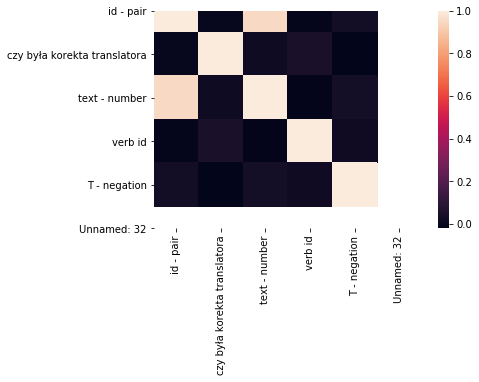

In [15]:
sb.heatmap(data.corr())

## Eksport danych do plików csv

In [17]:
inputData = data[['verb', 'verb - main semantic class', 'verb - second semantic class', 'verb - third semantic class', 'verb - tense']]

outputData = data[['verb - veridical (positive enviroment)', 'verb - veridical (negative enviroment)']]

inputData.to_csv(path_or_buf = "input.csv", index=False)
outputData.to_csv(path_or_buf = "output.csv", index=False)